In [2]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

class agent():
    def __init__(self, m = 16, 
                 start_x = 0, start_y = 2, 
                 target_x = 9, target_y = 9, 
                 possible_genes = ['up', 'right', 'left']):
        self.x, self.y  = start_x, start_y
        self.target_x, self.target_y = target_x, target_y
        self.pathx, self.pathy = [start_x], [start_y]
        
        self.possible_genes = possible_genes
        self.take_action = {'up': self.go_up, 
                            'left':self.go_left, 
                            'right':self.go_right}
        
        self.m = m
        self.create_genotype()
        self.phenotype()
    
    def go_up(self): 
        self.y = self.y +1
    def go_left(self): 
        self.x = self.x-1
    def go_right(self): 
        self.x = self.x+1

    def create_genotype(self):
        self.genome = np.random.choice(self.possible_genes, size = self.m)
    
    def set_gene(self, new_gene):
        self.genome = new_gene
    
    def phenotype(self):
        for gene in self.genome:
            self.take_action[gene]()
            
            self.pathx.append(self.x)
            self.pathy.append(self.y)
    
    def fitness(self):
        error_x = (self.target_x - self.pathx[-1])
        error_y = (self.target_y - self.pathy[-1])
        return 1/(1 + np.sqrt(error_x**2 + error_y**2))
    
    def draw(self, verbose = True):
        if verbose: print(self.genome)
        plt.plot(self.target_x, self.target_y, 'g*', markersize=30)
        plt.plot(self.pathx[-1], self.pathy[-1], 'r^', markersize=25)
        plt.plot(self.pathx, self.pathy)
        plt.axis((-2,self.target_x+2,0,self.target_y+2))
        plt.grid()

In [3]:
class evolution():
    def __init__(self, N = 10, possible_genes = ['up', 'right', 'left']):
        self.N = N
        self.possible_genes = possible_genes
        
        self.population = [agent() for i in range(N)]
        self.fitness_values = [self.population[i].fitness() for i in range(N)]
        
        total_fitness = sum(self.fitness_values)
        self.reproduction_probabiliy = [val/total_fitness for val in self.fitness_values]
        
        self.best_agent = self.population[np.argmax(self.fitness_values)]
        
    def selection(self):
        parents = np.random.choice(self.N, size = 2, p = self.reproduction_probabiliy)
        return parents
    
    def crossover(self, parent0, parent1):
        cutoff = np.random.randint(len(parent0.genome))
        child= np.concatenate((parent0.genome[:cutoff],parent1.genome[cutoff:]))
        return child

    def mutation(self, child):
        mutation_point = np.random.randint(len(child.genome))
        child.genome[mutation_point] = np.random.choice(self.possible_genes)
        
    def create_offspring(self):
        parents = self.selection()
        P0, P1 = self.population[parents[0]], self.population[parents[1]]
        
        child_agent = agent()
        child_genome = self.crossover(parent0 = P0, parent1 = P1)
        child_agent.set_gene(child_genome)
        self.mutation(child_agent)
        
        return child_agent
    
    def create_new_population(self):
        new_population = [self.create_offspring() for i in range(self.N-1)] + [self.best_agent]
        self.population = new_population

        self.fitness_values = [self.population[i].fitness() for i in range(self.N)]
        total_fitness = sum(self.fitness_values)
        self.reproduction_probabiliy = [val/total_fitness for val in self.fitness_values]
        self.best_agent = self.population[np.argmax(self.fitness_values)]
    
    def evolve(self, G = 10):
        for i in range(G):
            self.create_new_population()
        return self.best_agent

['left' 'up' 'left' 'right' 'right' 'right' 'right' 'left' 'right' 'up'
 'right' 'right' 'left' 'right' 'right' 'up']


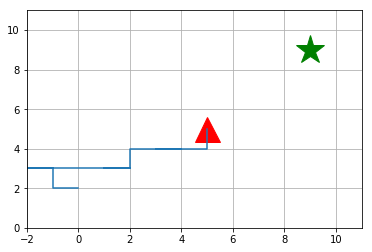

In [4]:
world = evolution()
world.best_agent.draw()

['right' 'up' 'left' 'right' 'left' 'up' 'left' 'left' 'up' 'up' 'up'
 'left' 'up' 'up' 'up' 'left']


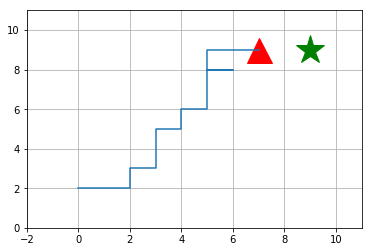

In [5]:
world.evolve()
world.best_agent.draw()

['right' 'up' 'left' 'right' 'left' 'up' 'left' 'left' 'up' 'up' 'up'
 'left' 'up' 'up' 'up' 'left']


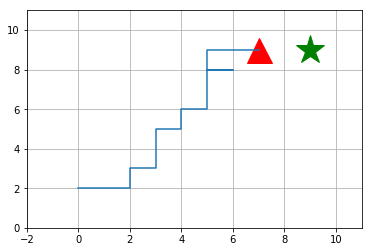

In [6]:
world.evolve()
world.best_agent.draw()

['right' 'right' 'up' 'right' 'left' 'up' 'left' 'left' 'up' 'up' 'right'
 'left' 'right' 'up' 'up' 'up']


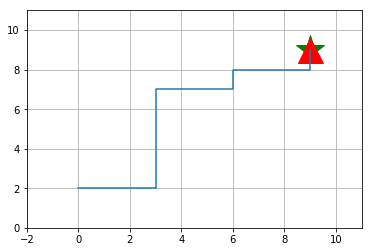

In [7]:
world.evolve(G = 100)
world.best_agent.draw()

['right' 'right' 'up' 'right' 'left' 'up' 'left' 'left' 'up' 'up' 'right'
 'left' 'right' 'up' 'up' 'up']


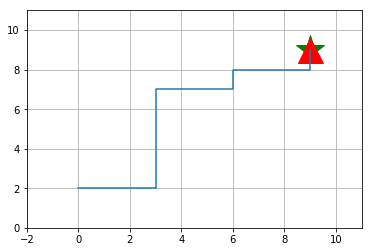

In [8]:
world.evolve(G = 100)
world.best_agent.draw()

['right' 'right' 'up' 'right' 'left' 'up' 'left' 'left' 'up' 'up' 'right'
 'left' 'right' 'up' 'up' 'up']


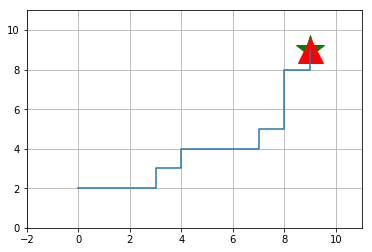

In [9]:
world.evolve(G = 1000)
world.best_agent.draw()